In [1]:
import pandas as pd
from pandas.io.json import json_normalize  
import scienceplots
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

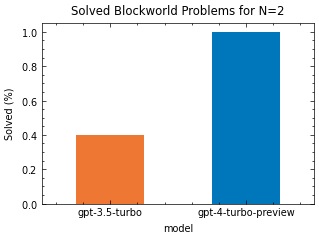

In [77]:
plt.style.use(['science', 'no-latex', 'nature'])
data_file = "data/exp2-2024-04-22-14_33_42.json"
with open(data_file, "r") as f:
    data = json.load(f)
# df = pd.DataFrame(data['results'])
# # convert each dict in the 'results' column to a separate column
# df_gpt3 = pd.DataFrame(df['gpt-3.5-turbo'].values.tolist(), index=df.index)
# df_gpt4 = pd.DataFrame(df['gpt-4-turbo-preview'].values.tolist(), index=df.index)
# # create multi-level column names for gpt3 and gpt4 and then concat
# df_gpt3.columns = pd.MultiIndex.from_product([['gpt-3.5-turbo']])
# df_gpt4.columns = pd.MultiIndex.from_product([['gpt-4-turbo-preview']])
# df = pd.concat([df_gpt3, df_gpt4], axis=1)
df =pd.DataFrame.from_dict(data['results'],orient='columns').stack().to_frame()
df = pd.DataFrame(df[0].values.tolist(), index=df.index).reset_index()
# df.rename_axis('model', inplace=True)
# group by model name
df.rename(columns={'level_1': 'model'}, inplace=True)
df = df.drop(columns=['level_0']).reset_index(drop=True)
df = df.groupby('model').sum()
df = df['solved']/5.0
df

# colors axes.prop_cycle : cycler('color', ['EE7733', '0077BB', '33BBEE', 'EE3377', 'CC3311', '009988', 'BBBBBB'])
colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']

df.plot(kind='bar', color=colors)
plt.ylabel('Solved (%)')
plt.xticks(rotation=0)
plt.title(f'Solved Blockworld Problems for N={data["meta"]}')
plt.tight_layout()



<AxesSubplot:xlabel='nblocks', ylabel='acc'>

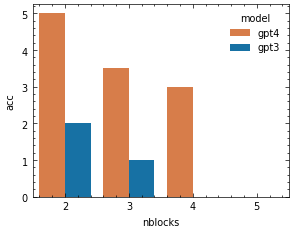

In [108]:
plt.style.use(['science', 'no-latex', 'nature'])
NBLOCKS=[i for i in range(4)]
results = {
    'gpt4': {2:5.0, 3:3.5, 4:3.0, 5:0.0},
    'gpt3': {2:2.0, 3:1.0, 4:0.0, 5:0.0},
}
df = pd.DataFrame(results)
df =df.stack().to_frame()
df.reset_index(inplace=True)
df.rename(columns={'level_1': 'model'}, inplace=True)
df.rename(columns={'level_0': 'nblocks'}, inplace=True)
df.rename(columns={df.columns.values[2]: 'acc'}, inplace=True)
df.head()
colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
sns.barplot(data=df, x='nblocks', y='acc', hue='model', palette=colors)   


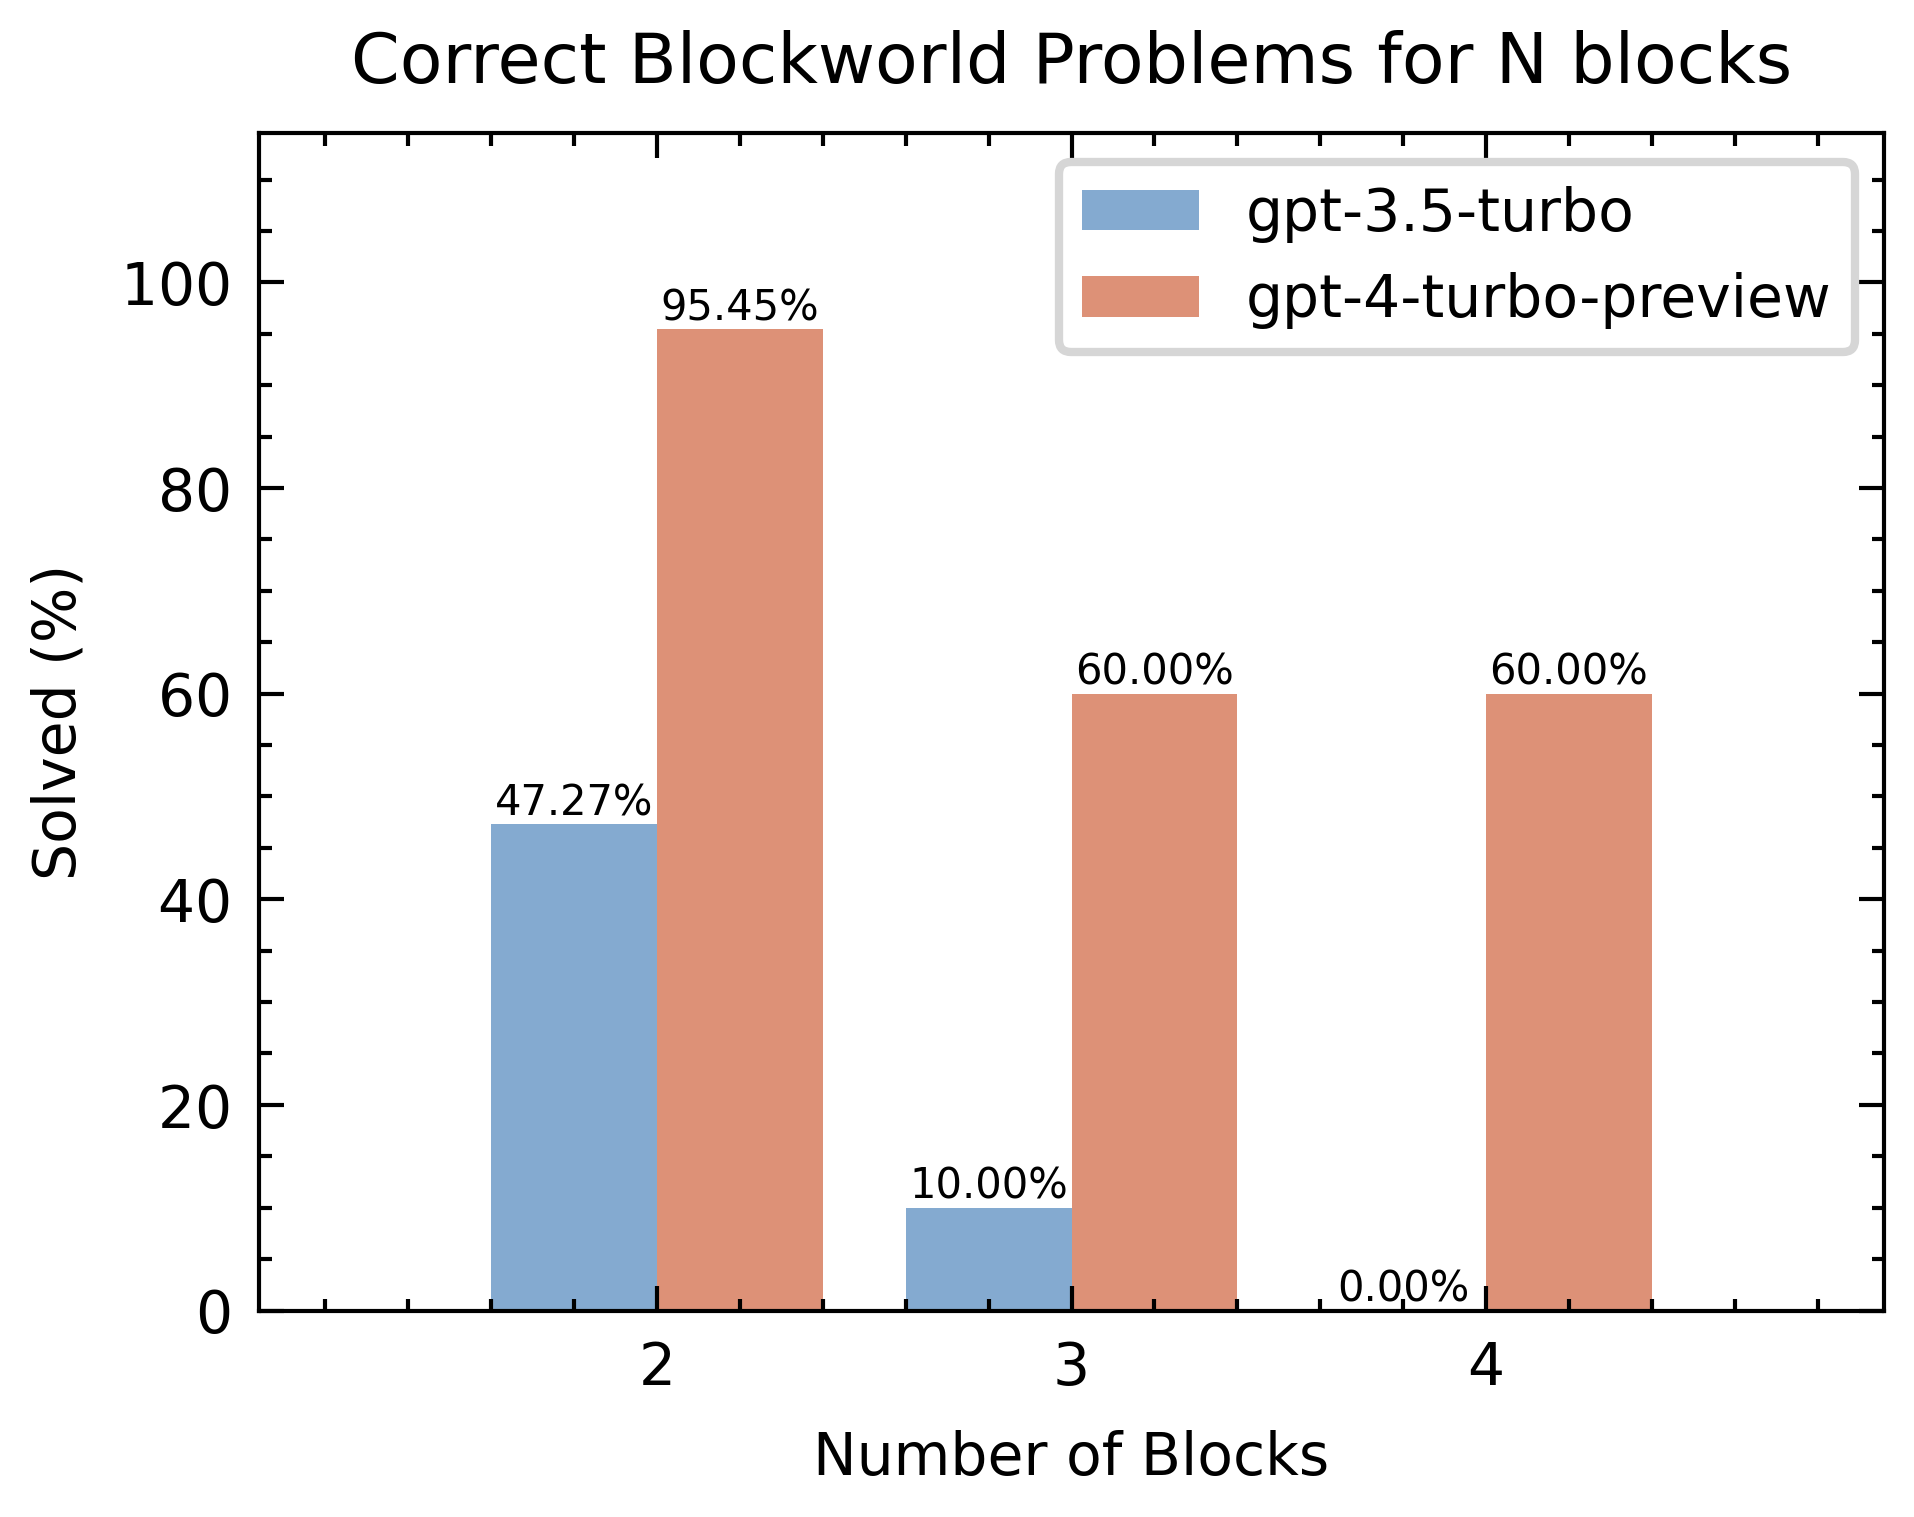

In [91]:
DATA_PATH = './data'
dir = os.listdir(DATA_PATH)
df = pd.DataFrame(columns=["nblocks", "model", "acc", "iters"])

for file in dir:
    if file.startswith('exp'):
        with open(os.path.join(DATA_PATH, file), 'r') as f:
            data = json.load(f)
            results = data['results']
            for model in results:
                acc = 0
                iters = 0
                count = len(results[model])
                for expi in results[model]:
                    if expi['solved']:
                        acc += 1
                        iters += expi['iters']

                # if data["meta"] in df["nblocks"].tolist() and model in df["model"].tolist():
                #     df.loc[(df["nblocks"] == data["meta"]) & (df["model"] == model), "acc"] += acc
                # else:
                df = df._append({"nblocks": data["meta"], 'model': model, "acc": acc / count, "iters": float(iters)}, ignore_index=True)

df = df.groupby(['nblocks', 'model']).mean()*100.0
# flatten multi-level column names
# df.columns = [col.strip() for col in df.columns.values]
# df.reset_index(inplace=True)
# df = df.pivot(index='nblocks', columns='model', values='acc')
# print(df.head())
# # ax = df.plot(kind='bar', rot=0)
# # ax.bar_label(ax.containers[0], fmt="%.2f")
# # ax.bar_label(ax.containers[1], fmt="%.2f")
# # grouped bar plot matplotlib
# fig, ax = plt.subplots(1,1)
# # set figure size
# fig.set_size_inches(10, 6)
# # set label font, title font, and legend font
# plt.rcParams.update({'font.size': 16, 'axes.labelsize': 12, 'legend.fontsize': 12})
# # set xticks and yticks font
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# barWidth = 0.25
# r1 = np.arange(len(df['gpt-3.5-turbo']))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
# plt.bar(r1, df['gpt-3.5-turbo'],  width=barWidth,  label='gpt-3.5-turbo')
# plt.bar(r2, df['gpt-4-turbo-preview'], width=barWidth,  label='gpt-4-turbo-preview')
# plt.xlabel('Number of Blocks', fontweight='bold', fontsize=12)
# plt.ylabel('Solved (%)', fontweight='bold', fontsize=12)
# plt.xticks([r + barWidth for r in range(len(df['gpt-3.5-turbo']))], df.index)
# plt.title('Solved Blockworld Problems\nfor N blocks')
# plt.legend()
# ax.bar_label(ax.containers[0], fmt=f"%.2f", fontsize=12)
# ax.bar_label(ax.containers[1], fmt=f"%.2f", fontsize=12)

# plt.show()

# df.head()
# print()
# colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
plt.style.use(['science', 'no-latex', 'nature', 'light'])
# plt.figure(figsize=(15,8))
ax = sns.barplot(data=df, x='nblocks', y='acc', hue='model')
# df.plot.bar(x='nblocks', y='acc', rot = 0)
plt.tight_layout()
plt.title(f'Correct Blockworld Problems for N blocks')
plt.xlabel('Number of Blocks')
plt.ylabel('Solved (%)')
# alabels = [f"{acc:.2f}" for acc in df[df['model']=='gpt-4-turbo-preview']['acc']]
alabels=[f"{a:.2f}%" for a in df.query('model == "gpt-3.5-turbo"')['acc']]
blabels=[f"{a:.2f}%" for a in df.query('model == "gpt-4-turbo-preview"')['acc']]
ax.bar_label(ax.containers[0], fmt=f"%.2f", labels=alabels, fontsize=5)
ax.bar_label(ax.containers[1], fmt=f"%.2f", labels=blabels, fontsize=5)
ax.margins(0.2, 0.2)
plt.legend(frameon=True)
# add bar labels

# plt.show()


# sns.barplot(data=df, x='nblocks', y='iters', hue='model')
# plt.tight_layout()
# plt.show()

